In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
transposed_loaded_data = np.loadtxt('./airplane_train.csv', unpack = True, delimiter = ',', skiprows = 1)

print(transposed_loaded_data.shape)

(3, 300)


### 입력데이터와 정답데이터의 관계를 파악하기 위해 그래프를 그려봄
### 입력이 Speed, Weight 두개이므로 입력데이터를 x1, x2 로 구분함

In [5]:
training_x1_data = transposed_loaded_data[0] #전치행렬 되기 전의 speed 열
training_x2_data = transposed_loaded_data[1] #전치행렬 되기 전의 Weight 열
training_t_data = transposed_loaded_data[2] #전치행렬 되기 전의 정답인 열

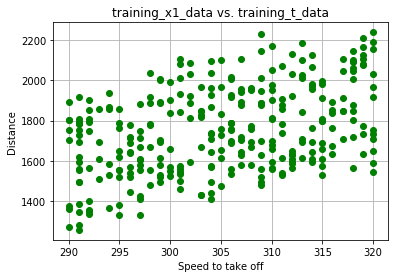

In [6]:
plt.title('training_x1_data vs. training_t_data')
plt.xlabel('Speed to take off')
plt.ylabel('Distance')
plt.grid()

plt.plot(training_x1_data, training_t_data, 'go')

plt.show()

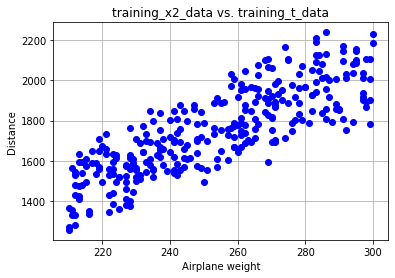

In [7]:
plt.title('training_x2_data vs. training_t_data')
plt.xlabel('Airplane weight')
plt.ylabel('Distance')
plt.grid()

plt.plot(training_x2_data, training_t_data, 'bo')

plt.show()

### 입력값과 정답이 큰 값(>1000) 이므로 데이터 정규화 수행

In [8]:
def minmax_normalize(data):
    min_val = data.min()
    max_val = data.max()
    
    return (data - min_val) / (max_val - min_val)

def minmax_get_denormalize(normalized_data, data_array):
    
    max_val, min_val = data_array.max(), data_array.min()
    
    denormalized_data = normalized_data * (max_val - min_val) + min_val
    
    return denormalized_data

def minmax_get_normalize(data, data_array):
    
    min_val = data_array.min()
    max_val = data_array.max()
    
    return (data - min_val ) / (max_val - min_val)

In [9]:
normalized_training_x1_data = minmax_normalize(training_x1_data)

normalized_training_x2_data = minmax_normalize(training_x2_data)

normalized_training_t_data = minmax_normalize(training_t_data)

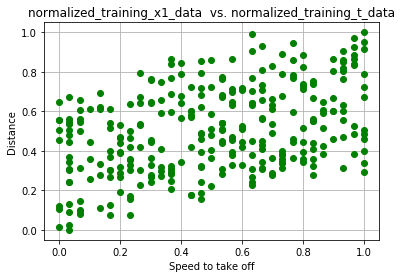

In [10]:
plt.title('normalized_training_x1_data  vs. normalized_training_t_data')
plt.xlabel('Speed to take off')
plt.ylabel('Distance')
plt.grid()
plt.plot(normalized_training_x1_data, normalized_training_t_data, 'go')

plt.show()

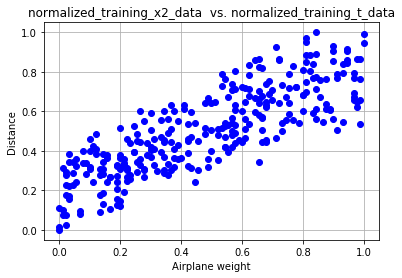

In [11]:
# 파란색(b)에 둥근점(o)으로 시각화

plt.title('normalized_training_x2_data  vs. normalized_training_t_data')
plt.xlabel('Airplane weight')
plt.ylabel('Distance')
plt.grid()
plt.plot(normalized_training_x2_data, normalized_training_t_data, 'bo')

plt.show()

In [12]:
#학습을 위한 입력데이터, 정답데이터 구성

training_input_data_list = [[x1_data for x1_data in normalized_training_x1_data],
                           [x2_data for x2_data in normalized_training_x2_data]]

training_input_data = np.array(training_input_data_list).reshape(-1,2)

training_target_data = normalized_training_t_data.reshape(-1,1)

print('training_input_data.shape = ', training_input_data.shape, ', training_target_data.shape = ', training_target_data.shape)

np.savetxt('./airplane_train_data.csv', training_input_data, delimiter= ',')
np.savetxt('./airplane_target_data.csv', training_target_data, delimiter= ',')

training_input_data.shape =  (300, 2) , training_target_data.shape =  (300, 1)


In [21]:
learning_rate = 1e-4 
input_nodes = training_input_data.shape[1]
hidden_nodes = 40
output_nodes = 1
epochs = 1


In [22]:
X_DATA = tf.placeholder(tf.float32, [None, input_nodes])
T_DATA = tf.placeholder(tf.float32, [None, output_nodes])

W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))
b2 = tf.Variable(tf.random_normal([hidden_nodes]))

W3 = tf.Variable(tf.random_normal([hidden_nodes, output_nodes]))
b3 = tf.Variable(tf.random_normal([output_nodes]))

In [23]:
#feed forward
Z2 = tf.matmul(X_DATA, W2) + b2
A2 = tf.sigmoid(Z2)

y = Z3 = tf.matmul(A2, W3) + b3

loss = tf.reduce_mean(tf.square(y-T_DATA))

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [25]:
with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화

    start_time = datetime.now()
    
    for i in range(epochs):
    
        for step in range(100001):
      
            loss_val, _ = sess.run([loss, train], feed_dict={X_DATA: training_input_data, T_DATA: training_target_data})    
        
            if step % 1000 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    
    
    #######################################################################################################
    # test data 로딩
    transposed_loaded_test_data = np.loadtxt('./airplane_test.csv', unpack=True, delimiter=',', skiprows=1)
    
    
    # 테스트를 위한 입력 데이터 / 정답 데이터 분리
    test_x1_data = transposed_loaded_test_data[0]  # 전치행렬되기 전의 Speed 열 (column)

    test_x2_data = transposed_loaded_test_data[1]  # 전치행렬되기 전의 Weight 열 (column)

    test_t_data = transposed_loaded_test_data[2]   # 전치행렬되기 전의 정답인 Distance 열 (column)
    
    
    # 테스트 데이터 정규화 진행
    normalized_test_x1_data = minmax_normalize(test_x1_data)
    
    normalized_test_x2_data = minmax_normalize(test_x2_data)
    
    normalized_test_t_data = minmax_normalize(test_t_data)
    
    
    # 테스트를 위한 입력데이터, 정답데이터 구성

    test_input_data_list = [ [ x1_data for x1_data in normalized_test_x1_data ],
                             [ x2_data for x2_data in normalized_test_x2_data ] ]

    test_input_data = np.array(test_input_data_list).reshape(-1,2)  # 리스트 이므로 numpy 변형 후 reshape

    test_target_data = normalized_test_t_data.reshape(-1,1)

    print('test_input_data.shape = ', test_input_data.shape, ', test_target_data.shape = ', test_target_data.shape)
    
    
    # 테스트 데이터에 대한 예측 값, 즉 정규화된 이륙거리 예측
    normalized_predicted_distance = sess.run(y, feed_dict={X_DATA: test_input_data})
    
    # 정규값을 실제 거리로 변환함. 이때 테스트의 정규화되지 않은 정답데이터에 대해 역정규화해주어야 함
    real_predicted_distance = minmax_get_denormalize(normalized_predicted_distance, test_t_data)
    
    # 예측값과 실제값을 비교하기 위한 리스트
    #temp_list = []  # 임시리스트
    #prediction_label_list = []  # 예측값_정답 리스트
    
    #for index in range(len(test_t_data)):
        
        #temp_list.append(real_predicted_distance[index])  # 예측값 저장
        #temp_list.append(test_t_data[index])
        
        #prediction_label_list.append(temp_list)
        
        #temp_list = []
        
    
    #print("")
    #print("===========================================================")
    #print(prediction_label_list)
    
    print("===========================================================")
    for index in range(len(test_t_data)):
        
        print("prediction = ", real_predicted_distance[index], ", label = ", test_t_data[index])

epochs =  0 , step =  0 , loss_val =  2.016989
epochs =  0 , step =  1000 , loss_val =  0.34623504
epochs =  0 , step =  2000 , loss_val =  0.31394124
epochs =  0 , step =  3000 , loss_val =  0.29066733
epochs =  0 , step =  4000 , loss_val =  0.26956123
epochs =  0 , step =  5000 , loss_val =  0.2503911
epochs =  0 , step =  6000 , loss_val =  0.23297015
epochs =  0 , step =  7000 , loss_val =  0.21712671
epochs =  0 , step =  8000 , loss_val =  0.20271242
epochs =  0 , step =  9000 , loss_val =  0.18959436
epochs =  0 , step =  10000 , loss_val =  0.17765042
epochs =  0 , step =  11000 , loss_val =  0.16676953
epochs =  0 , step =  12000 , loss_val =  0.15685633
epochs =  0 , step =  13000 , loss_val =  0.14781922
epochs =  0 , step =  14000 , loss_val =  0.13958113
epochs =  0 , step =  15000 , loss_val =  0.13206553
epochs =  0 , step =  16000 , loss_val =  0.12520859
epochs =  0 , step =  17000 , loss_val =  0.118953384
epochs =  0 , step =  18000 , loss_val =  0.11324321
epochs =